### Gradient Descent
 - Gradient descent is an algorithm you can use to train models in both neural networks and machine learning. It uses a cost function to optimize its parameters, showing the accuracy of a machine learning model under training at each parameter.  Gradient descent existed as a mathematical concept before the emergence of machine learning. 
 - GD and it's variation are used to train not just linear regression, but some of the biggest and most complex algorithm models in AI.

 

### How does gradient descent work?

Gradient descent works with convex functions and finds the fewest and most accurate amount of steps toward the lowest point of a curve, optimizing the path. Let’s go over a couple of terms that inform gradient descent before examining how they work:

    Parameters: The coefficients of the function that minimize the cost

    Cost function: Also called the “loss function” in machine learning, is the difference between the actual and predicted value at the present position. A model stops learning once this function gets as close as possible to 0.0 

    Learning rate: Sometimes referred to as the step rate or alpha, is the magnitude of the steps the function takes as it minimizes the cost 

### Basics of performing gradient descent

The goal is to have the cost = 0.0 or the closest acceptable minimum. To calculate this, start by writing the cost function. 

    Write the cost function as cost =f(x)with x as the coefficient. 

    Use a starting coefficient of 0.0 or any small number. 

    Take the derivate or partial derivative if multiple variables are present to find the gradient to know which direction to move in on the curve. 

    Once you have a gradient (the derivative of the cost function) and know which way to move, use your learning rate to tell how much the value of the coefficient changes every calculation.  

    Repeat until the cost is zero or as close as it can reach. 

Gradient descent involves knowledge of calculus, but its implementation is always the same series of steps. 

## Formula: 
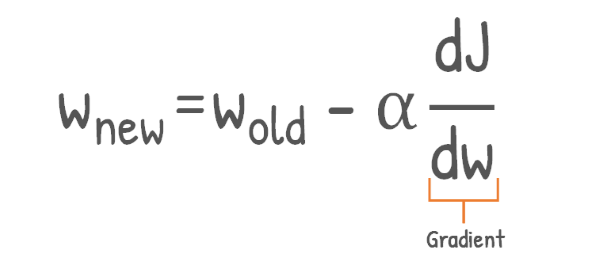

### where,
- w_new: It is new parameter
- w_old: It is previous parameter.
- alpha: It is learning rate
- d_j: cost function
- d_w: Gradient

## Learning rate (also referred to as step size or the alpha):
- The size of the steps taken to reach the minimum is known as step size. It is usually a small number and is adjusted depending on the behavior of the cost function. 
- LR controls how big of a step you take when updating the model's parameters, w and b.
- The choice of LR, Alpha will have a huge impact on the efficiency of your implementation of GD.
- If LR is chosen poorly rate of GD may not even work at all.

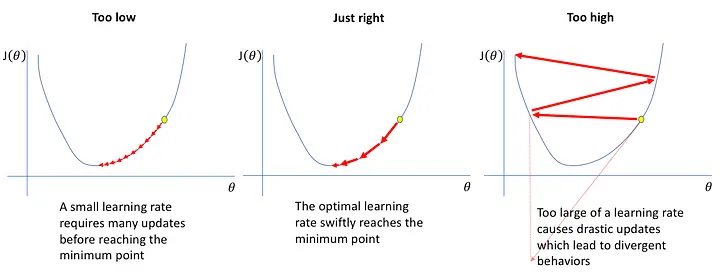

### In the above figure we have 3 cases of Learning Rate:
#### 1. If too small
    - It will take very little step to reach the minimum.
    - You do end up decreasing the cost J but increaibly slowly

#### 2. If too large
    - Overshoot, chance of never reaching the minumum.
    - Fail to coverage
    
#### 3. If just right
    - Can reach local minimum with fixed Learning Rate



### Implement Gradient Descent For Neural Network (or Logistic Regression)
#### Predicting if a person would buy life insurnace based on his age using logistic regression


In [50]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [51]:
df = pd.read_csv('insurance_data.csv')
df.head()

,age,affordibility,bought_insurance
0,22,1,0
1,25,0,0
2,47,1,1
3,52,0,0
4,46,1,1


In [52]:
df.shape

(28, 3)

In [53]:
df.isnull().sum()

age                 0
affordibility       0
bought_insurance    0
dtype: int64

Dataset doesn't contain null value, We can move on.

### splitting the df for training and testing.


In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['age','affordibility']],df.bought_insurance,test_size=0.2, random_state=42)

In [55]:
X_train.shape

(22, 2)

In [56]:
X_test.shape

(6, 2)

X_train has 80 % of record from the dataframe and x_test has 20%.

In [69]:
X_train_scaled = X_train.copy()
X_train_scaled['age'] = X_train_scaled['age'] / 100

X_test_scaled = X_test.copy()
X_test_scaled['age'] = X_test_scaled['age'] / 100

In [70]:
X_train_scaled.head()

,age,affordibility
17,0.58,1
22,0.40,1
11,0.28,1
13,0.29,0
15,0.55,1


#### We can see age 58 is converted into 0.58, age 40 is converted into 0.40 and so on after scaling.
#### Now our age is between 0 and 1, we did it because to bring age and affordability in the same scale.

### Model Building: First build a model in keras/tensorflow and see what weights and bias values it comes up with. We will than try to reproduce same weights and bias in our plain python implementation of gradient descent. Below is the architecture of our simple neural network

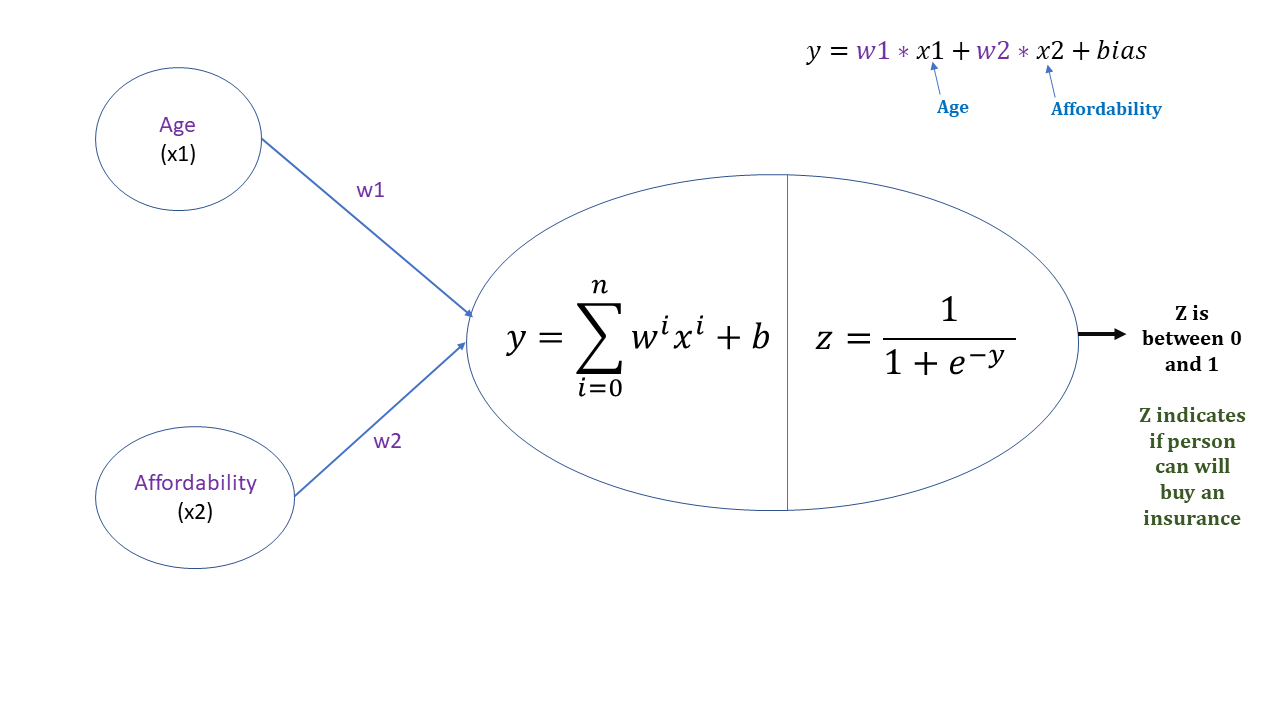

In [71]:
# Build a model

model = keras.Sequential([
    keras.layers.Dense(1, activation='relu', kernel_initializer='ones', bias_initializer='zeros')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5909 - loss: 4.5420
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.5909 - loss: 4.5419
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5909 - loss: 4.5417
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.5909 - loss: 4.5415
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.5909 - loss: 4.5414
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - accuracy: 0.5909 - loss: 4.5412
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.5909 - loss: 4.5410
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.5909 - loss: 4.5409
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.5909 - loss: 4.5407
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5909 - loss: 4.5406


In [72]:
model.evaluate(X_test_scaled, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step - accuracy: 0.8333 - loss: 2.7540


[2.7540464401245117, 0.8333333134651184]

In [73]:
X_test_scaled.head()

,age,affordibility
9,0.61,1
25,0.54,1
8,0.62,1
21,0.26,0
0,0.22,1


In [74]:
model.predict(X_test_scaled)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step


array([[1.5939945 ],
       [1.5246911 ],
       [1.603895  ],
       [0.24747771],
       [1.2078757 ],
       [0.2573782 ]], dtype=float32)

Our model is performing well.

Let's verify it.

In [78]:
y_test

9     1
25    1
8     1
21    0
0     0
12    0
Name: bought_insurance, dtype: int64

If anything less than 0.5 it means person will not but insurance and vice versa

In [79]:
# Let's see the weights and bias
coef, intercept = model.get_weights()


In [80]:
coef, intercept


(array([[0.99004793],
        [1.        ]], dtype=float32),
 array([-0.00993475], dtype=float32))

### Now we start implementing gradient descent in plain python. Again the goal is to come up with same w1, w2 and bias that keras model calculated. We want to show how keras/tensorflow would have computed these values internally using gradient descent



### First write couple of helper routines such as sigmoid and log_loss



In [81]:
def sigmoid_numpy(X):
   return 1/(1+np.exp(-X))

sigmoid_numpy(np.array([12,0,1]))

array([0.99999386, 0.5       , 0.73105858])

In [83]:
def predicted_function(age, affordability):
    weighted_sum = coef[0] * age, coef[1] * affordability + intercept
    return sigmoid_numpy(weighted_sum)

# let's predict from above x_test_scaled
predicted_function(0.99, 1)

TypeError: bad operand type for unary -: 'tuple'

In [84]:
def log_loss(y_true, y_predicted):
    epsilon = 1e-15
    y_predicted_new = [max(i,epsilon) for i in y_predicted]
    y_predicted_new = [min(i,1-epsilon) for i in y_predicted_new]
    y_predicted_new = np.array(y_predicted_new)
    return -np.mean(y_true*np.log(y_predicted_new)+(1-y_true)*np.log(1-y_predicted_new))

In [102]:
def gradient_descent(age, affordability, y_true, epochs, loss_thresold):
    w1 = w2 = 1
    bias = 0
    rate = 0.02
    n = len(age)
    for i in range(epochs):
        weighted_sum = w1 * age + w2 * affordability + bias
        y_predicted = sigmoid_numpy(weighted_sum)
        loss = log_loss(y_true, y_predicted)

        w1d = (1/n)*np.dot(np.transpose(age),(y_predicted-y_true)) 
        w2d = (1/n)*np.dot(np.transpose(affordability),(y_predicted-y_true)) 

        bias_d = np.mean(y_predicted-y_true)
        w1 = w1 - rate * w1d
        w2 = w2 - rate * w2d
        bias = bias - rate * bias_d

        print (f'Epoch:{i}, w1:{w1}, w2:{w2}, bias:{bias}, loss:{loss}')

        if loss<=loss_thresold:
            break

    return w1, w2, bias

In [103]:
gradient_descent(X_train_scaled['age'],X_train_scaled['affordibility'],y_train,10, 0.4631)


Epoch:0, w1:0.9989475972753892, w2:0.9972555524391064, bias:-0.004699580666708179, loss:0.7428288579142563
Epoch:1, w1:0.997904804862983, w2:0.9945281430099263, bias:-0.009374343765740646, loss:0.7412969126651684
Epoch:2, w1:0.9968716027968403, w2:0.9918177523282395, bias:-0.014024344755285217, loss:0.7397822348825204
Epoch:3, w1:0.9958479705936903, w2:0.9891243598405154, bias:-0.018649640377151493, loss:0.7382846915047723
Epoch:4, w1:0.9948338872595502, w2:0.9864479438354874, bias:-0.023250288639307184, loss:0.7368041490854914
Epoch:5, w1:0.9938293312964245, w2:0.9837884814559752, bias:-0.027826348798220914, loss:0.7353404738265016
Epoch:6, w1:0.9928342807090855, w2:0.9811459487109456, bias:-0.03237788134102171, loss:0.73389353161074
Epoch:7, w1:0.9918487130119299, w2:0.9785203204878034, bias:-0.036904947967485405, loss:0.7324631880348016
Epoch:8, w1:0.9908726052359065, w2:0.9759115705649024, bias:-0.04140761157185823, loss:0.7310493084411676
Epoch:9, w1:0.9899059339355126, w2:0.97331

(0.9899059339355126, 0.9733196716242691, -0.04588593622452757)

In [104]:
coef, intercept

(array([[0.99004793],
        [1.        ]], dtype=float32),
 array([-0.00993475], dtype=float32))